<a href="https://colab.research.google.com/github/vqrca/testando_modelos_regressao/blob/main/Notebooks/aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 1: Regressão linear múltipla**

##**Conhecendo e preparando os dados**

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
url <- 'https://raw.githubusercontent.com/alura-cursos/testando_modelos_regressao/refs/heads/main/Dados/automoveis_usados.csv'

In [ ]:
dados <- read.csv(url)

In [ ]:
head(dados)

,Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,SUV 4 portas,2005,275,6,28.96812,29695
2,seda,2016,170,4,61.15492,30495
3,minivan de passageiros,2016,248,6,45.06152,37650
4,seda,2015,138,4,57.93624,16170
5,seda,1991,162,4,32.18680,2000
6,picape cabine estendida,2012,152,4,37.01482,19299


In [ ]:
any(is.na(dados))

[1] FALSE

In [ ]:
dados <- dados %>%
  mutate(Estilo = as.factor(Estilo))

In [ ]:
glimpse(dados)

Rows: 10,819
Columns: 6
$ Estilo             <fct> SUV 4 portas, seda, minivan de passageiros, seda, s…
$ Ano                <int> 2005, 2016, 2016, 2015, 1991, 2012, 2016, 1994, 199…
$ Potencia_motor     <dbl> 275, 170, 248, 138, 162, 152, 365, 230, 205, 155, 1…
$ Cilindros_motor    <dbl> 6, 4, 6, 4, 4, 4, 6, 6, 6, 4, 4, 6, 4, 4, 6, 4, 6, …
$ Consumo_estrada_km <dbl> 28.96812, 61.15492, 45.06152, 57.93624, 32.18680, 3…
$ Valor              <int> 29695, 30495, 37650, 16170, 2000, 19299, 42600, 238…


In [ ]:
summary(dados)

                     Estilo          Ano       Potencia_motor  Cilindros_motor 
 seda                   :2780   Min.   :1990   Min.   : 55.0   Min.   : 3.000  
 SUV 4 portas           :2309   1st Qu.:2006   1st Qu.:169.0   1st Qu.: 4.000  
 cupe                   : 854   Median :2014   Median :210.0   Median : 6.000  
 picape cabine dupla    : 681   Mean   :2010   Mean   :228.1   Mean   : 5.379  
 hatchback 4 portas     : 665   3rd Qu.:2016   3rd Qu.:285.0   3rd Qu.: 6.000  
 picape cabine estendida: 623   Max.   :2017   Max.   :707.0   Max.   :12.000  
 (Other)                :2907                                                  
 Consumo_estrada_km     Valor      
 Min.   :19.31      Min.   : 2000  
 1st Qu.:35.41      1st Qu.:19999  
 Median :41.84      Median :28410  
 Mean   :42.96      Mean   :28609  
 3rd Qu.:49.89      3rd Qu.:38190  
 Max.   :85.30      Max.   :74000  
                                   

##**Analisando a relação entre as variáveis**

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

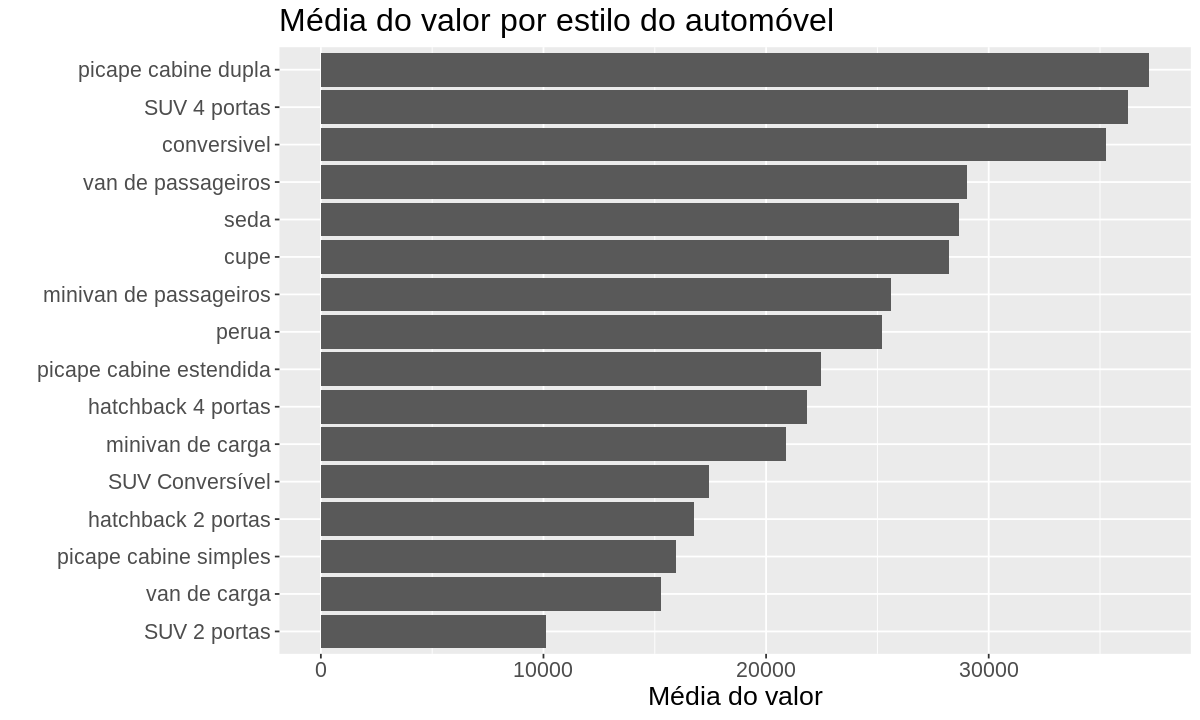

In [ ]:
dados %>%
  group_by(Estilo) %>%
  summarise(media_valor = mean(Valor)) %>%
  ggplot(aes(x = reorder(Estilo, media_valor), y = media_valor)) +
  geom_col() +
  coord_flip() +
    labs(title = 'Média do valor por estilo do automóvel',
         x = '',
         y = 'Média do valor') +
           theme(text = element_text(size = 16))

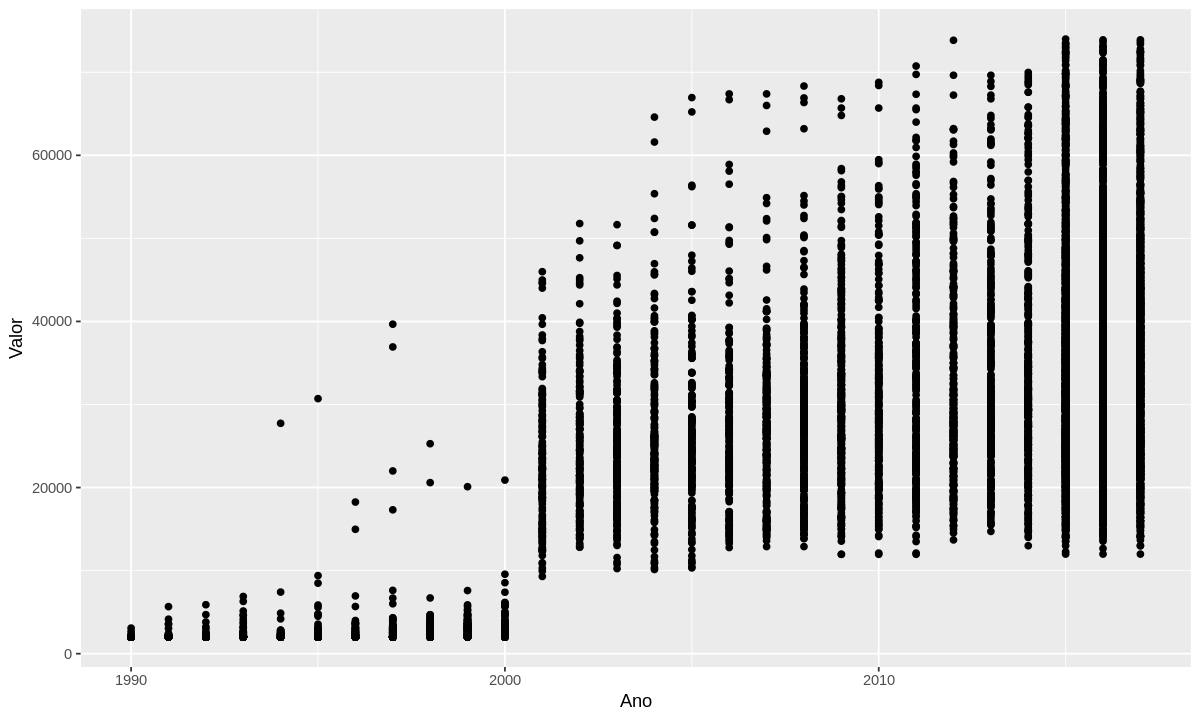

In [ ]:
ggplot(dados, aes(x = Ano, y = Valor)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


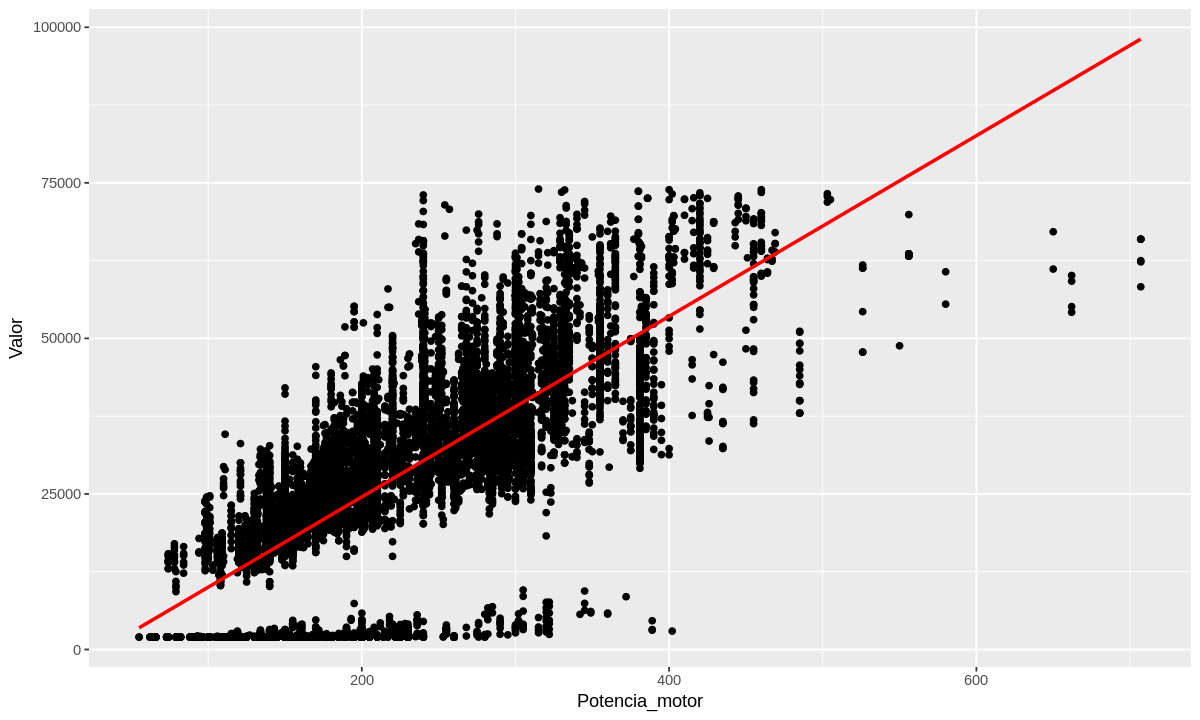

In [ ]:
ggplot(dados, aes(x = Potencia_motor, y = Valor)) +
  geom_point() +
    geom_smooth(method = 'lm', se = FALSE, color = 'red')

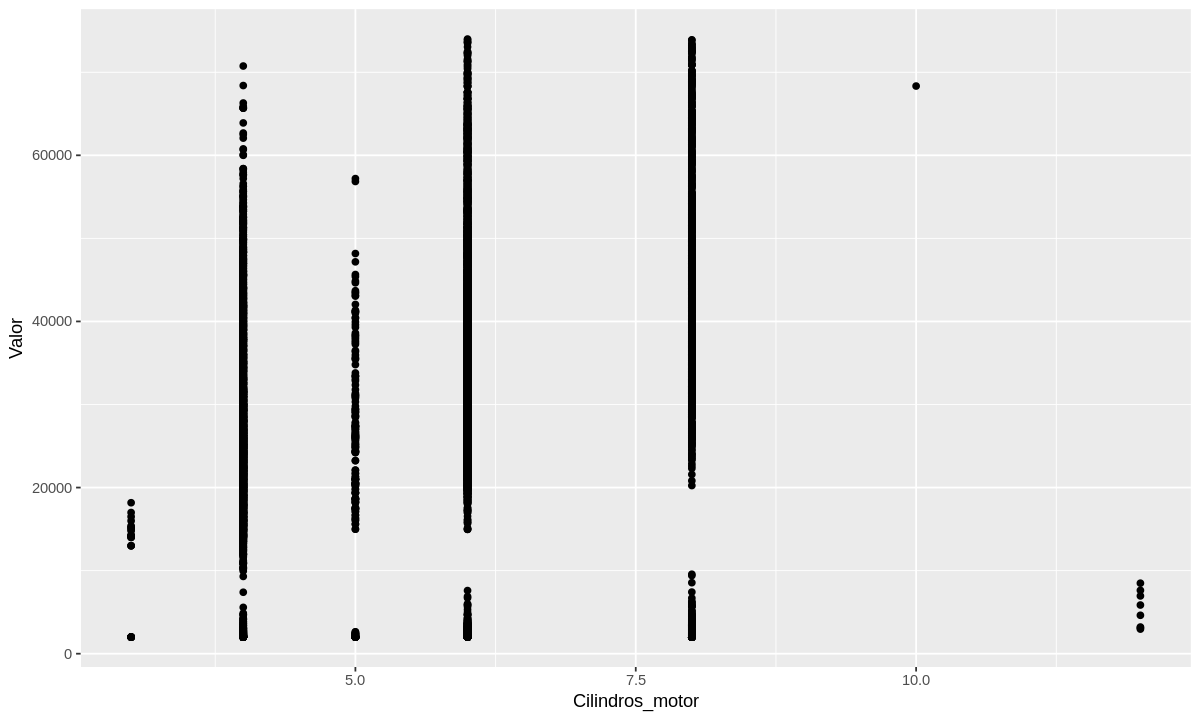

In [ ]:
ggplot(dados, aes(x = Cilindros_motor, y = Valor)) +
  geom_point()

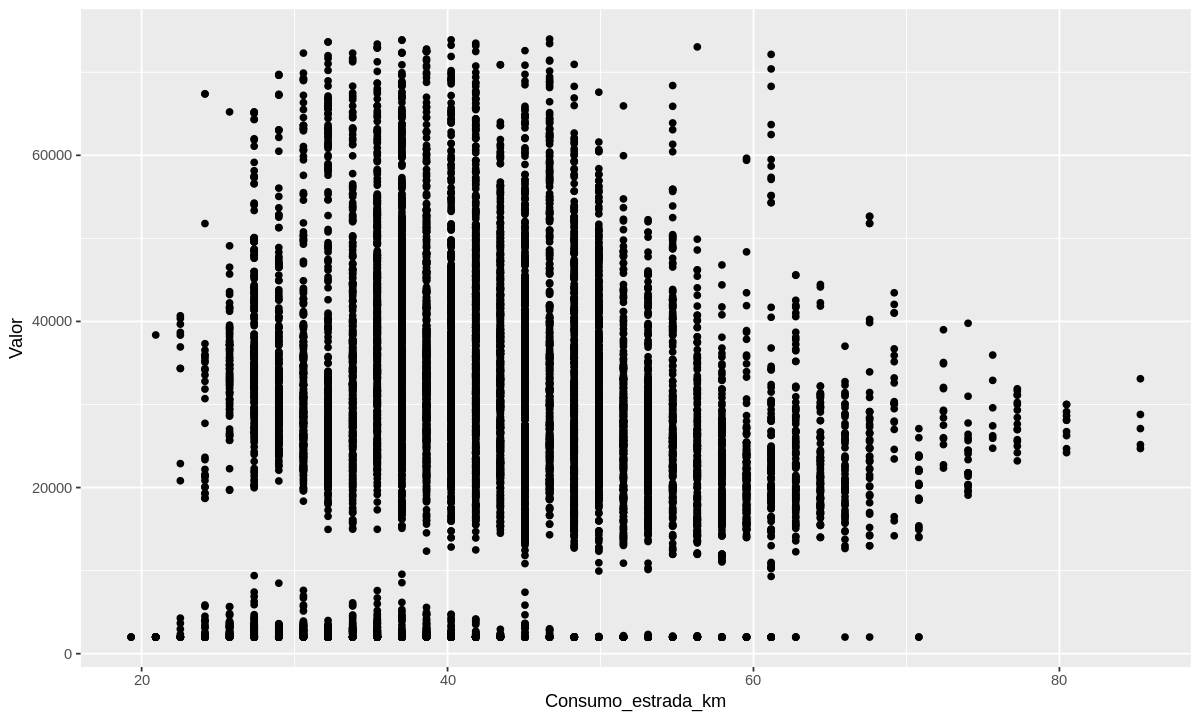

In [ ]:
ggplot(dados, aes(x = Consumo_estrada_km, y = Valor)) +
  geom_point()

In [ ]:
dados_numericos <- dados %>% select_if(is.numeric)

matriz_correlacao <- cor(dados_numericos)

matriz_correlacao

,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor
Ano,1.0000000,0.3890908,-0.1065934,0.35776466,0.69665546
Potencia_motor,0.3890908,1.0000000,0.6952144,-0.43319516,0.73612504
Cilindros_motor,-0.1065934,0.6952144,1.0000000,-0.70162167,0.30405466
Consumo_estrada_km,0.3577647,-0.4331952,-0.7016217,1.00000000,-0.04757501
Valor,0.6966555,0.7361250,0.3040547,-0.04757501,1.00000000


##**Construindo o modelo de regressão linear múltipla**

In [ ]:
modelo_linear_simples <- lm(Valor ~ Potencia_motor, data = dados)

summary(modelo_linear_simples)


Call:
lm(formula = Valor ~ Potencia_motor, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-50886  -5112   1506   6183  42714 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4494.228    310.542  -14.47   <2e-16 ***
Potencia_motor   145.125      1.283  113.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10800 on 10817 degrees of freedom
Multiple R-squared:  0.5419,	Adjusted R-squared:  0.5418 
F-statistic: 1.279e+04 on 1 and 10817 DF,  p-value: < 2.2e-16


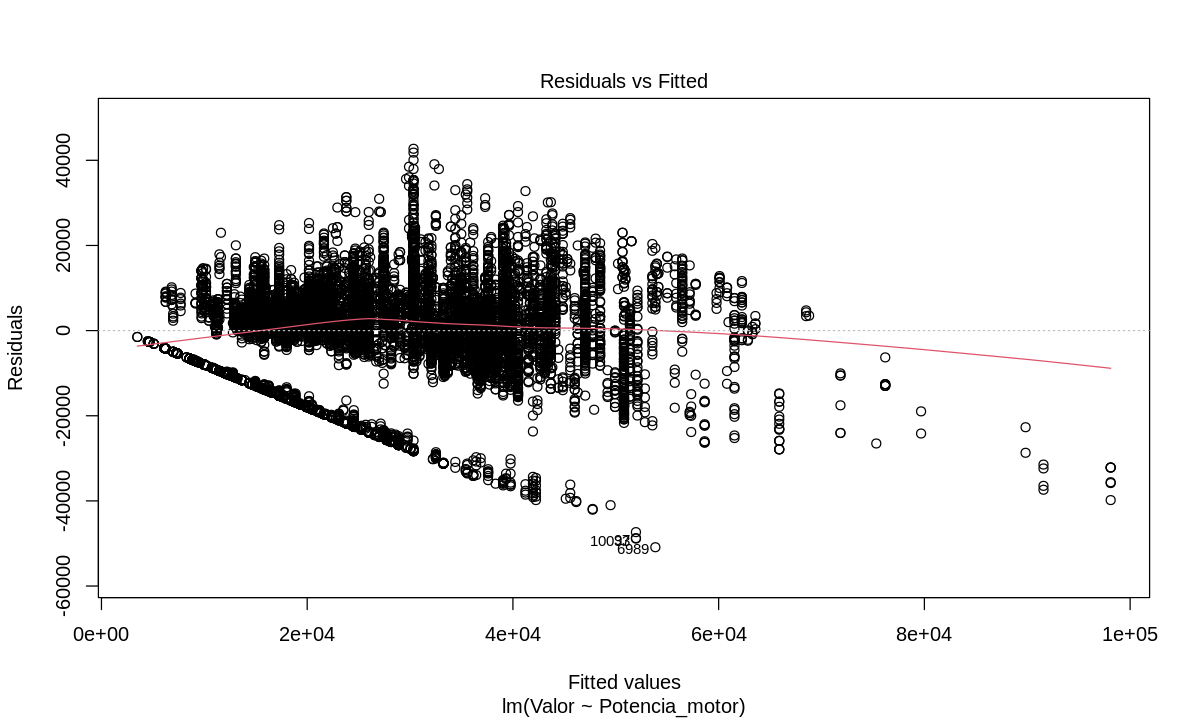

In [ ]:
plot(modelo_linear_simples, which=1)

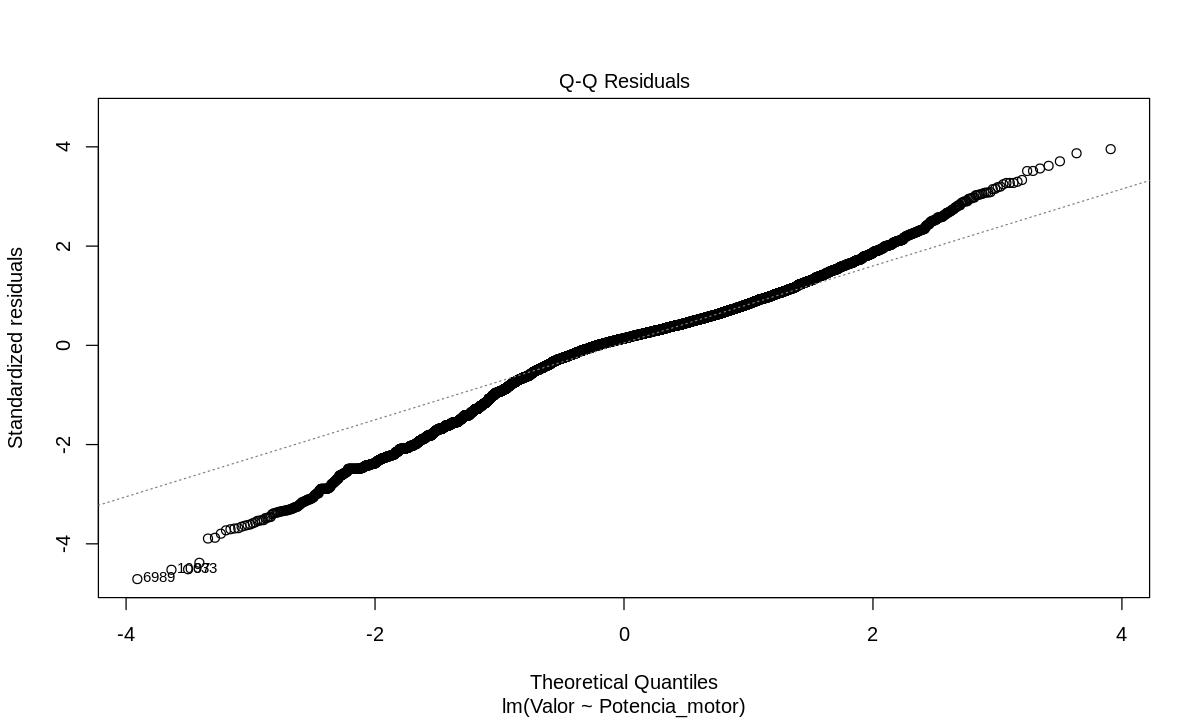

In [ ]:
plot(modelo_linear_simples, which=2)

In [ ]:
modelo_linear_multiplo <- lm(Valor ~ ., data= dados)

summary(modelo_linear_multiplo)


Call:
lm(formula = Valor ~ ., data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-30733  -4994   -517   4499  39640 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.882e+06  3.350e+04 -56.184  < 2e-16 ***
Estilocupe                    -7.247e+03  4.228e+02 -17.141  < 2e-16 ***
Estilohatchback 2 portas      -6.511e+03  4.796e+02 -13.578  < 2e-16 ***
Estilohatchback 4 portas      -7.363e+03  4.538e+02 -16.226  < 2e-16 ***
Estilominivan de carga        -6.454e+03  9.881e+02  -6.531 6.81e-11 ***
Estilominivan de passageiros  -4.768e+03  5.126e+02  -9.301  < 2e-16 ***
Estiloperua                   -4.246e+03  4.568e+02  -9.296  < 2e-16 ***
Estilopicape cabine dupla     -8.134e+03  4.715e+02 -17.252  < 2e-16 ***
Estilopicape cabine estendida -1.134e+04  4.826e+02 -23.495  < 2e-16 ***
Estilopicape cabine simples   -1.100e+04  5.298e+02 -20.765  < 2e-16 ***
Estiloseda                    -4.824e+03  3.596e+02 -

#**Aula 2: Árvore de decisão**

##**Separando os dados em treino e teste**

In [ ]:
install.packages('tidymodels')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [ ]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [ ]:
set.seed(6578)

df_split <- initial_split(dados, prop = 0.8)
df_split

<Training/Testing/Total>
<8655/2164/10819>

In [ ]:
df_treino <- training(df_split)
df_teste <- testing(df_split)

##**Treinando o modelo**

In [ ]:
arvore <- decision_tree() %>%
  set_engine('rpart') %>%
  set_mode('regression')

In [ ]:
set.seed(4556)

modelo_arvore_decisao <- arvore %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [ ]:
modelo_arvore_decisao

parsnip model object

n= 8655 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 8655 2.211151e+12 28564.100  
   2) Ano< 2000.5 1344 6.595049e+09  2526.276 *
   3) Ano>=2000.5 7311 1.125860e+12 33350.700  
     6) Potencia_motor< 216 3344 1.287282e+11 24209.120  
      12) Potencia_motor< 166.5 1392 2.697496e+10 19965.940 *
      13) Potencia_motor>=166.5 1952 5.881843e+10 27235.000 *
     7) Potencia_motor>=216 3967 4.821132e+11 41056.630  
      14) Potencia_motor< 310.5 2800 2.144520e+11 37429.220  
        28) Estilo=hatchback 2 portas,minivan de carga,minivan de passageiros,picape cabine dupla,picape cabine estendida,picape cabine simples,van de carga 677 1.777117e+10 32227.800 *
        29) Estilo=conversivel,cupe,hatchback 4 portas,perua,seda,SUV 2 portas,SUV 4 portas,SUV Conversível,van de passageiros 2123 1.725240e+11 39087.890 *
      15) Potencia_motor>=310.5 1167 1.424214e+11 49759.920  
        30) Estilo=cupe,perua,picape cabine dupla,picape cabine

In [ ]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart.plot)

Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




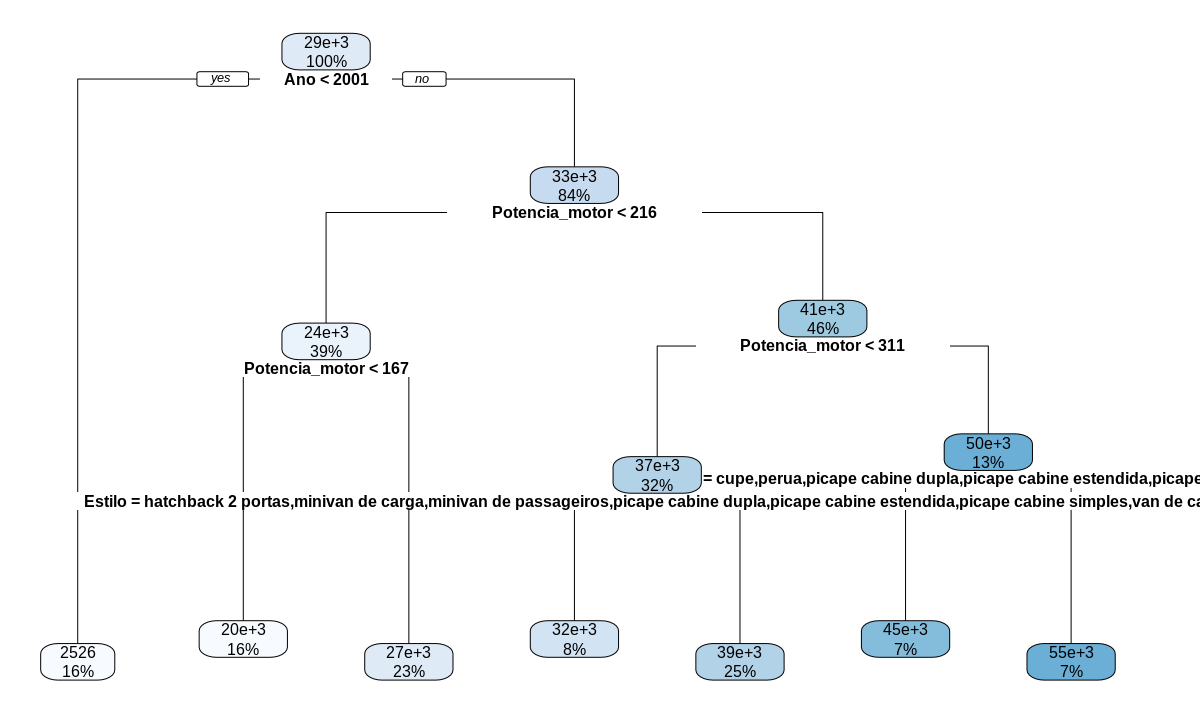

In [ ]:
arvore_plot <- rpart.plot(modelo_arvore_decisao$fit, roundint = FALSE, cex = 0.8)

In [ ]:
arvore_3 <- decision_tree(tree_depth = 3) %>%
  set_engine('rpart') %>%
  set_mode('regression')

In [ ]:
set.seed(4556)

modelo_arvore_decisao_3 <- arvore %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

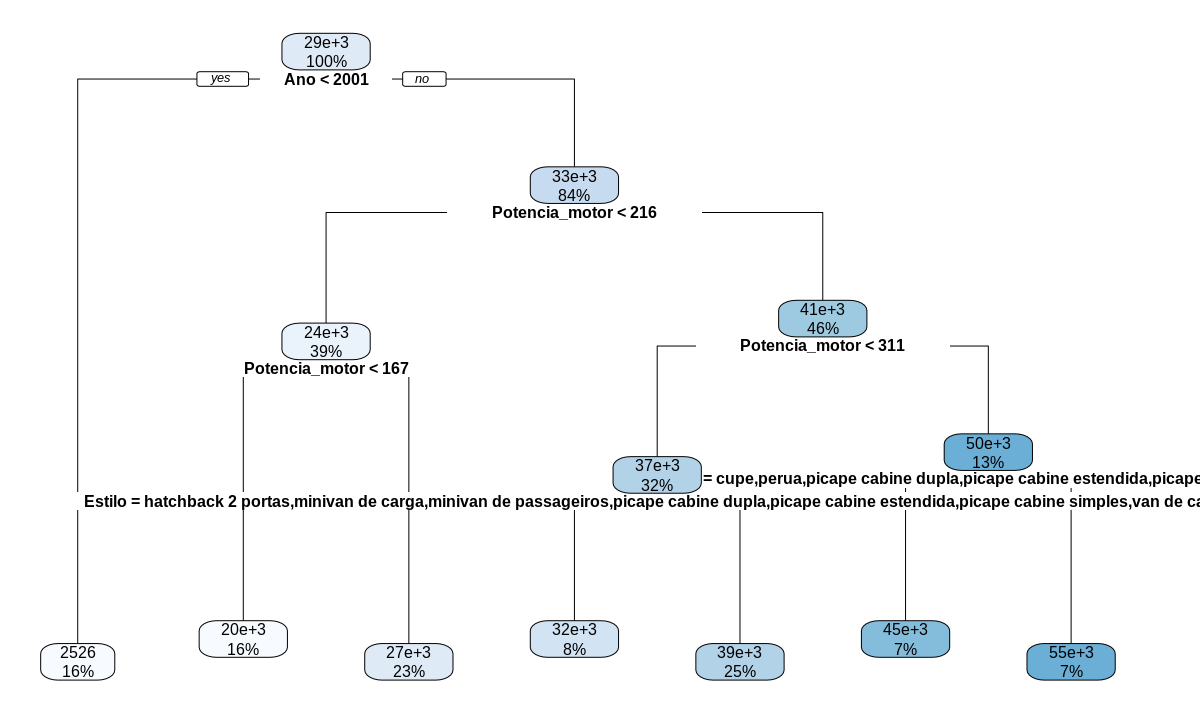

In [ ]:
arvore_3_plot <- rpart.plot(modelo_arvore_decisao_3$fit, roundint = FALSE, cex = 0.8)

##**Avaliando a performance do modelo**

In [ ]:
predicoes <- predict(modelo_arvore_decisao, new_data = df_teste)

In [ ]:
predicoes

.pred
<dbl>
19965.935
39087.894
27234.996
2526.276
27234.996
39087.894
27234.996
19965.935
27234.996


In [ ]:
predicoes_arvore <- bind_cols(df_teste, predicoes)

In [ ]:
predicoes_arvore

Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor,.pred
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
hatchback 2 portas,2015,106,4,59.54558,14845,19965.935
seda,2008,264,6,38.62416,25495,39087.894
hatchback 2 portas,2005,210,4,45.06152,23670,27234.996
perua,1991,162,4,32.18680,2000,2526.276
SUV 4 portas,2017,168,4,46.67086,23600,27234.996
SUV 4 portas,2017,284,6,43.45218,36100,39087.894
SUV 2 portas,2001,203,6,32.18680,21035,27234.996
hatchback 4 portas,2016,138,4,59.54558,17905,19965.935
hatchback 2 portas,2013,200,4,53.10822,31495,27234.996


In [ ]:
rsq(predicoes_arvore,
    estimate = .pred,
    truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.820248


In [ ]:
mae(predicoes_arvore,
    estimate = .pred,
    truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mae,standard,4783.037


In [ ]:
rmse(predicoes_arvore,
    estimate = .pred,
    truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6727.974


In [ ]:
calcular_metricas <- function(predicoes, valores_reais) {
  resultado <- tibble(
    predicao = predicoes,
    real = valores_reais
  )

  metricas <- resultado %>%
    metrics(truth = real, estimate = predicao)

  return(metricas)
}

In [ ]:
metricas_arvore <- calcular_metricas(predicoes_arvore$.pred, df_teste$Valor)
metricas_arvore

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6727.974202
rsq,standard,0.820248
mae,standard,4783.037334


##**Aplicando a técnica de validação cruzada**

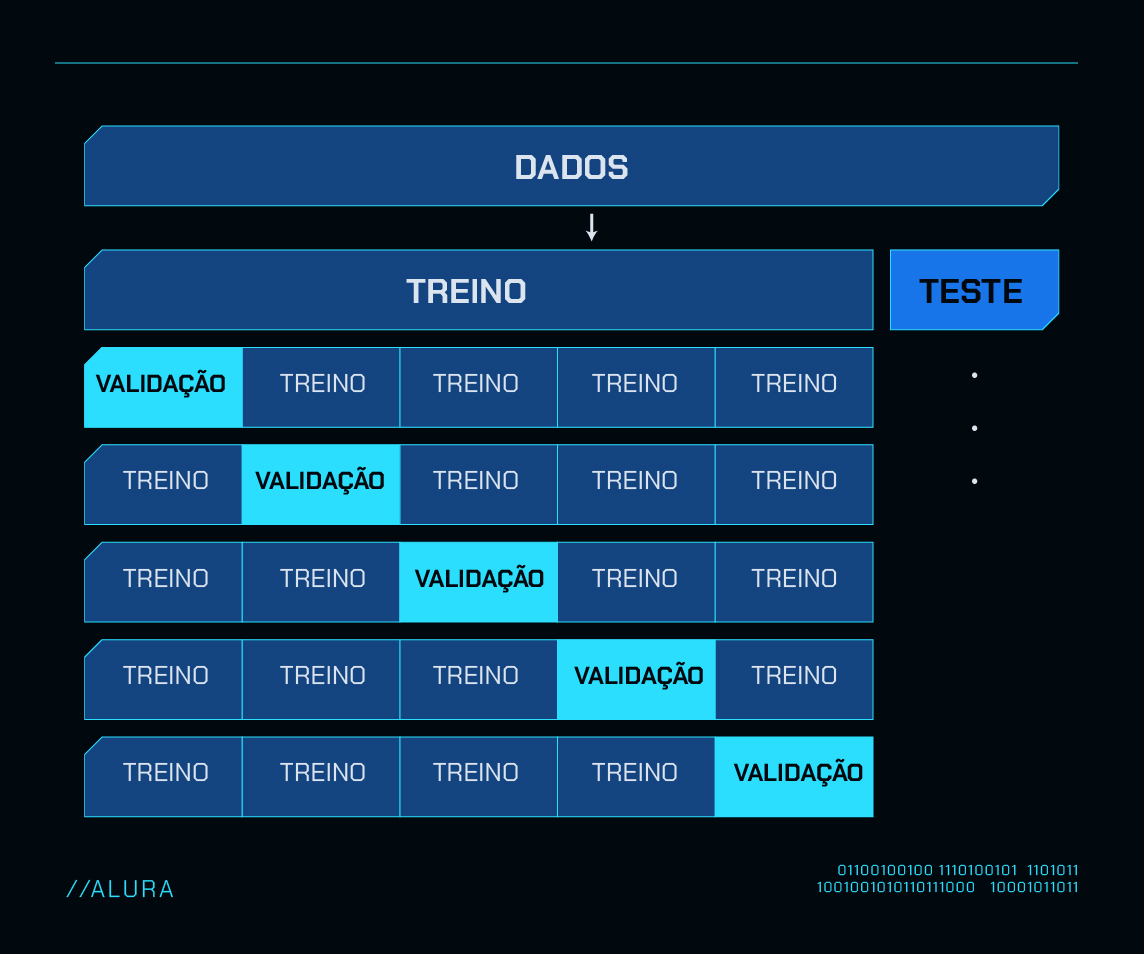

In [ ]:
set.seed(4556)

df_folds <- vfold_cv(df_treino, v = 5)

In [ ]:
set.seed(4456)

fits_cv <- fit_resamples(arvore,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

In [ ]:
metricas_cv <- collect_metrics(fits_cv, summarize = FALSE)
metricas_cv

id,.metric,.estimator,.estimate,.config
<chr>,<chr>,<chr>,<dbl>,<chr>
Fold1,rmse,standard,6666.1452563,Preprocessor1_Model1
Fold1,mae,standard,4770.0714765,Preprocessor1_Model1
Fold1,rsq,standard,0.8289911,Preprocessor1_Model1
Fold2,rmse,standard,6857.5945569,Preprocessor1_Model1
Fold2,mae,standard,4788.4718165,Preprocessor1_Model1
Fold2,rsq,standard,0.8196698,Preprocessor1_Model1
Fold3,rmse,standard,6773.7672352,Preprocessor1_Model1
Fold3,mae,standard,4782.4624105,Preprocessor1_Model1
Fold3,rsq,standard,0.8203407,Preprocessor1_Model1


In [ ]:
media_metricas_arvore <- collect_metrics(fits_cv)
media_metricas_arvore

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,4783.4155430,5,21.731132630,Preprocessor1_Model1
rmse,standard,6795.5869357,5,46.166763686,Preprocessor1_Model1
rsq,standard,0.8190876,5,0.002977559,Preprocessor1_Model1


#**Aula 3: Técnicas de Ensemble**

##**Aplicando a técnica de Bagging**

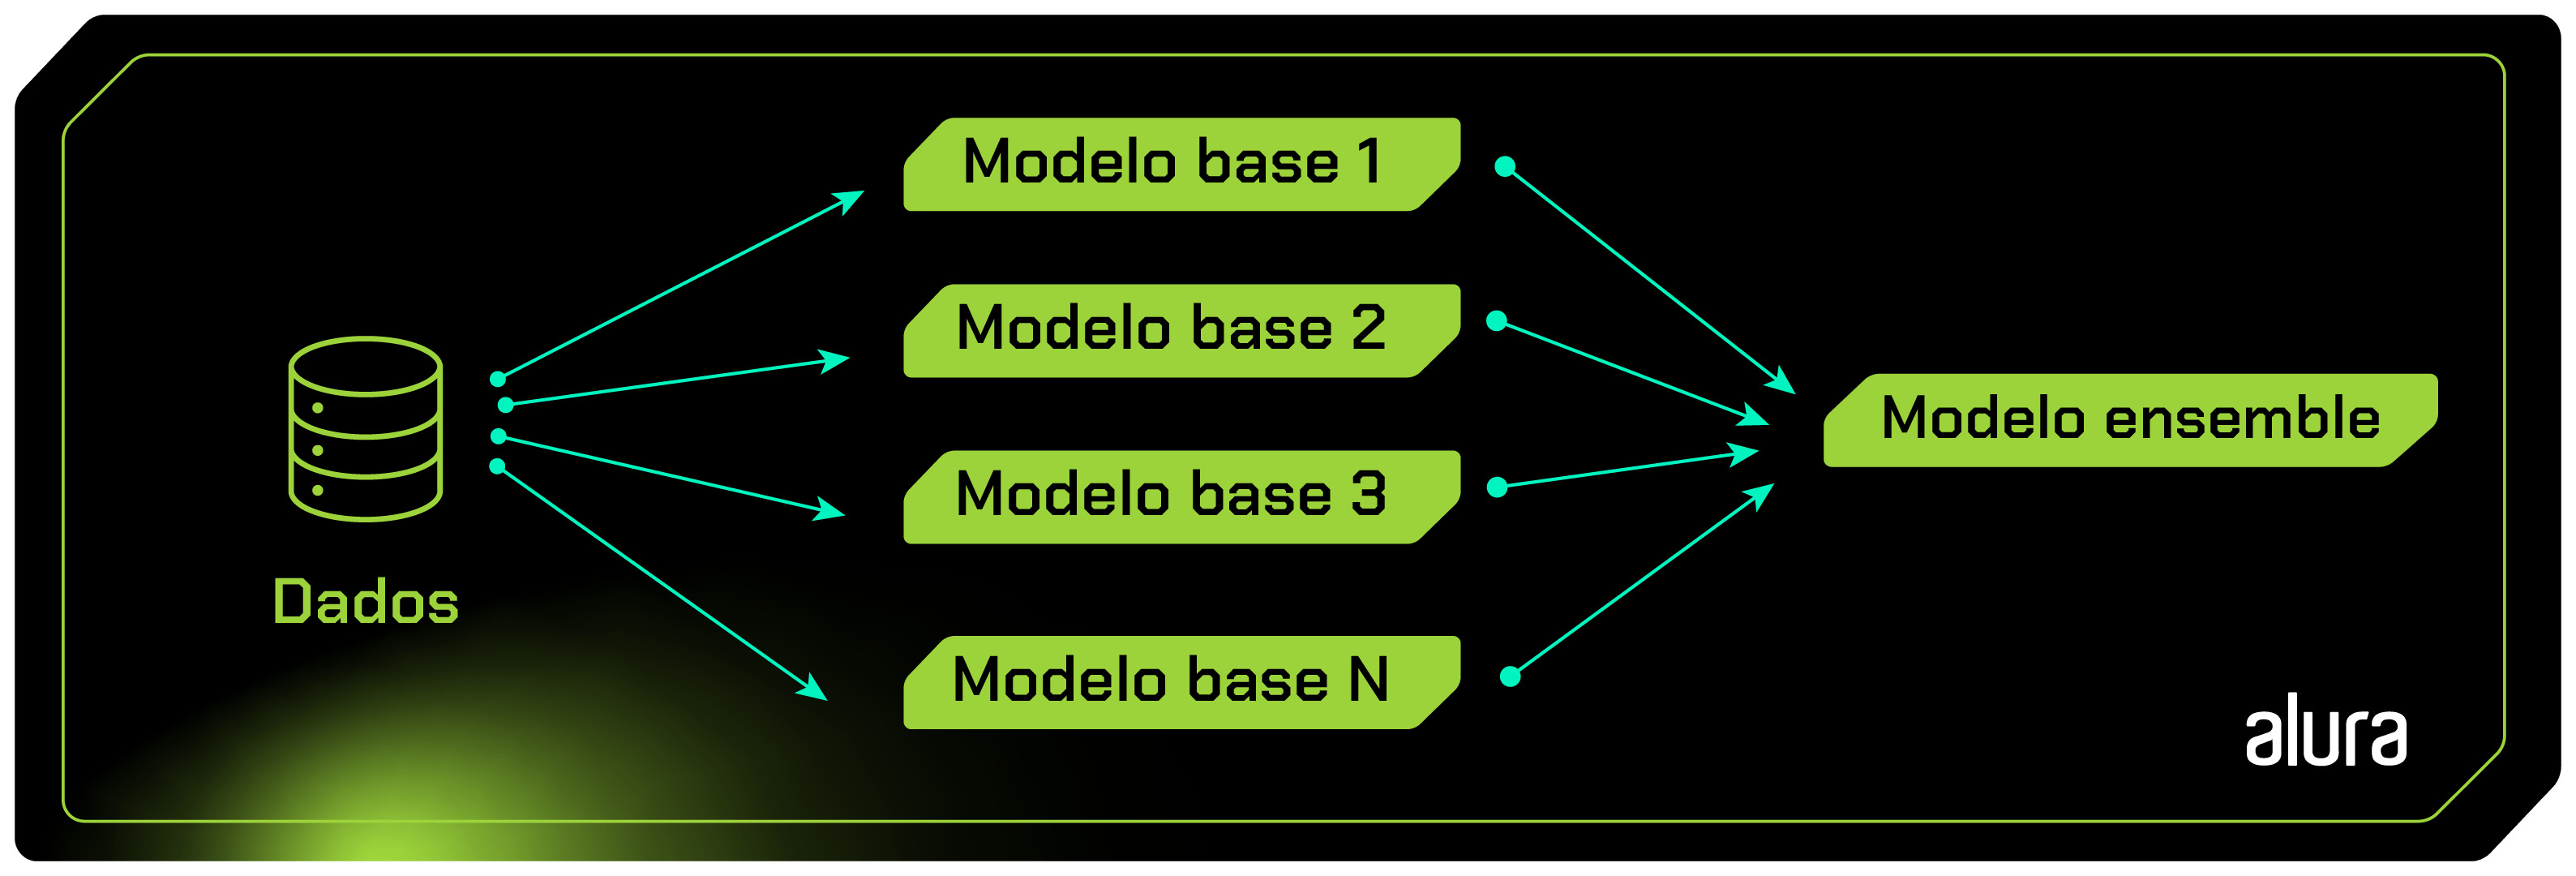

In [ ]:
install.packages('baguette')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('ranger')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(baguette)
library(ranger)

In [ ]:
bagging <- bag_tree() %>%
  set_mode('regression') %>%
  set_engine('rpart', times = 100)

In [ ]:
set.seed(4556)

modelo_bagging <- bagging %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [ ]:
modelo_bagging

parsnip model object

Bagged CART (regression with 100 members)

Variable importance scores include:

# A tibble: 3 × 4
  term             value   std.error  used
  <chr>            <dbl>       <dbl> <int>
1 Ano            1.24e12 2188886368.   100
2 Potencia_motor 9.77e11 2166065457.   100
3 Estilo         3.19e11 1250656068.   100


In [ ]:
predicoes <- predict(modelo_bagging, new_data = df_teste)

In [ ]:
predicoes_bagging <- bind_cols(df_teste, predicoes)

In [ ]:
predicoes_bagging

Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor,.pred
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
hatchback 2 portas,2015,106,4,59.54558,14845,16056.09
seda,2008,264,6,38.62416,25495,28489.01
hatchback 2 portas,2005,210,4,45.06152,23670,25001.69
perua,1991,162,4,32.18680,2000,2000.00
SUV 4 portas,2017,168,4,46.67086,23600,24951.54
SUV 4 portas,2017,284,6,43.45218,36100,36703.74
SUV 2 portas,2001,203,6,32.18680,21035,23570.72
hatchback 4 portas,2016,138,4,59.54558,17905,18102.96
hatchback 2 portas,2013,200,4,53.10822,31495,27757.42


In [ ]:
metricas_bagging <- calcular_metricas(predicoes_bagging$.pred, predicoes_bagging$Valor)
metricas_bagging

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4562.5555314
rsq,standard,0.9173159
mae,standard,3022.3345081


##**Avaliando a performance do modelo bagging**

In [ ]:
set.seed(4456)

fits_cv <- fit_resamples(bagging,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

In [ ]:
media_metricas_bagging <- collect_metrics(fits_cv)
media_metricas_bagging

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,2976.3107396,5,27.659366111,Preprocessor1_Model1
rmse,standard,4577.5347408,5,73.064356401,Preprocessor1_Model1
rsq,standard,0.9179594,5,0.002374638,Preprocessor1_Model1


##**Construindo um modelo com Random forest**

In [ ]:
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ranger’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
floresta_aleatoria <- rand_forest(trees = 100) %>%
  set_mode('regression') %>%
  set_engine('ranger')

In [ ]:
set.seed(4456)

modelo_floresta_aleatoria <- floresta_aleatoria %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [ ]:
modelo_floresta_aleatoria

parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, num.trees = ~100,      num.threads = 1, verbose = FALSE, seed = sample.int(10^5,          1)) 

Type:                             Regression 
Number of trees:                  100 
Sample size:                      8655 
Number of independent variables:  3 
Mtry:                             1 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       27633249 
R squared (OOB):                  0.891849 

In [ ]:
predicoes <- predict(modelo_floresta_aleatoria, new_data = df_teste)

In [ ]:
predicoes_floresta <- bind_cols(df_teste, predicoes)

In [ ]:
metricas_floresta <- calcular_metricas(predicoes_floresta$.pred, predicoes_floresta$Valor)
metricas_floresta

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5288.1087367
rsq,standard,0.8930113
mae,standard,3596.6924404


##**Avaliando a performance do modelo Random forest**

In [ ]:
floresta_aleatoria <- rand_forest(trees = 100, mtry = 2) %>%
  set_mode('regression') %>%
  set_engine('ranger')

In [ ]:
set.seed(4456)

fits_cv <- fit_resamples(floresta_aleatoria,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

In [ ]:
media_metricas_floresta <- collect_metrics(fits_cv)
media_metricas_floresta

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,2967.5366347,5,32.89725001,Preprocessor1_Model1
rmse,standard,4529.9875247,5,69.05623909,Preprocessor1_Model1
rsq,standard,0.9196103,5,0.00207145,Preprocessor1_Model1


#**Aula 4: Técnica de Boosting**

##**Aplicando a técnica de Boosting**

In [ ]:
install.packages('xgboost')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
boosting <- boost_tree() %>%
  set_mode('regression') %>%
  set_engine('xgboost') %>%
  set_args(trees = 100)

In [ ]:
set.seed(4556)

modelo_boosting <- boosting %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [ ]:
modelo_boosting

parsnip model object

##### xgb.Booster
raw: 349.6 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 100, watchlist = x$watchlist, 
    verbose = 0, nthread = 1, objective = "reg:squarederror")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "1", objective = "reg:squarederror", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 18 
niter: 100
nfeatures : 18 
evaluation_log:
  iter training_rmse
 <num>         <num>
     1     23356.511
     2     16914.813
   ---           ---
    99      3729.702
   100      3725.600

In [ ]:
predicoes <- predict(modelo_boosting, new_data = df_teste)

In [ ]:
predicoes_boosting <- bind_cols(df_teste, predicoes)

In [ ]:
metricas_boosting <- calcular_metricas(predicoes_boosting$.pred, predicoes_boosting$Valor)
metricas_boosting

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4483.2484389
rsq,standard,0.9201857
mae,standard,3024.2435636


##**Avaliando a performance do modelo**

In [ ]:
set.seed(4456)

fits_cv <- fit_resamples(boosting,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

In [ ]:
media_metricas_boosting <- collect_metrics(fits_cv)
media_metricas_boosting

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,2972.4183138,5,28.596628075,Preprocessor1_Model1
rmse,standard,4506.4203139,5,81.098190087,Preprocessor1_Model1
rsq,standard,0.9203949,5,0.002740729,Preprocessor1_Model1


##**Explorando o impacto dos parâmetros**

###**Número de árvores**

In [ ]:
set.seed(4456)

boosting_300 <- boost_tree() %>%
  set_mode('regression') %>%
  set_engine('xgboost') %>%
  set_args(trees = 300)

fits_cv <- fit_resamples(boosting_300,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

media_metricas_boosting_300 <- collect_metrics(fits_cv)
media_metricas_boosting_300

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,2913.5514533,5,28.725372725,Preprocessor1_Model1
rmse,standard,4487.6969849,5,79.796908090,Preprocessor1_Model1
rsq,standard,0.9211871,5,0.002688116,Preprocessor1_Model1


###**Taxa de aprendizagem**

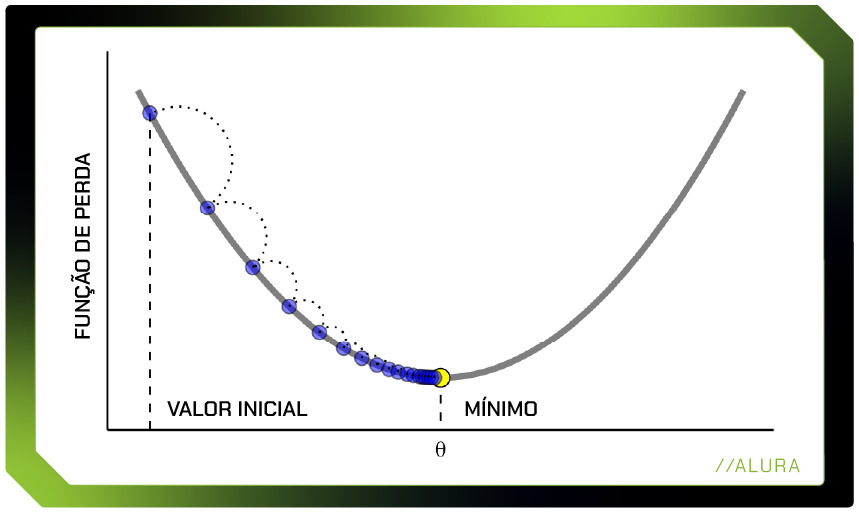

In [ ]:
set.seed(4456)

boosting_final <- boost_tree(learn_rate = 0.2) %>%
  set_mode('regression') %>%
  set_engine('xgboost') %>%
  set_args(trees = 300)

fits_cv <- fit_resamples(boosting_final,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

media_metricas_boosting_final <- collect_metrics(fits_cv)
media_metricas_boosting_final

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,2899.472767,5,26.232357937,Preprocessor1_Model1
rmse,standard,4454.513983,5,77.445477682,Preprocessor1_Model1
rsq,standard,0.922277,5,0.002603691,Preprocessor1_Model1


#**Aula 5: Comparando modelos e utilizando novos dados**

##**Comparando a performance dos diferentes modelos**

In [ ]:
media_metricas_arvore$Modelo <- 'Decision Tree'
media_metricas_bagging$Modelo <- 'Bagging'
media_metricas_floresta$Modelo <- 'Random Forest'
media_metricas_boosting$Modelo <- 'XGBoost'
media_metricas_boosting_final$Modelo <- 'XGBoost ajustado'

resultados_combinados <- bind_rows(
  media_metricas_arvore,
  media_metricas_bagging,
  media_metricas_floresta,
  media_metricas_boosting,
  media_metricas_boosting_final
)

resultados_combinados

.metric,.estimator,mean,n,std_err,.config,Modelo
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
mae,standard,4783.4155430,5,21.731132630,Preprocessor1_Model1,Decision Tree
rmse,standard,6795.5869357,5,46.166763686,Preprocessor1_Model1,Decision Tree
rsq,standard,0.8190876,5,0.002977559,Preprocessor1_Model1,Decision Tree
mae,standard,2976.3107396,5,27.659366111,Preprocessor1_Model1,Bagging
rmse,standard,4577.5347408,5,73.064356401,Preprocessor1_Model1,Bagging
rsq,standard,0.9179594,5,0.002374638,Preprocessor1_Model1,Bagging
mae,standard,2967.5366347,5,32.897250008,Preprocessor1_Model1,Random Forest
rmse,standard,4529.9875247,5,69.056239089,Preprocessor1_Model1,Random Forest
rsq,standard,0.9196103,5,0.002071450,Preprocessor1_Model1,Random Forest


In [ ]:
comparacao_modelos <- resultados_combinados %>%
  pivot_wider(
  names_from = .metric,
  values_from = mean,
  id_cols = Modelo
  )

comparacao_modelos

Modelo,mae,rmse,rsq
<chr>,<dbl>,<dbl>,<dbl>
Decision Tree,4783.416,6795.587,0.8190876
Bagging,2976.311,4577.535,0.9179594
Random Forest,2967.537,4529.988,0.9196103
XGBoost,2972.418,4506.420,0.9203949
XGBoost ajustado,2899.473,4454.514,0.9222770


##**Salvando o modelo com melhor performance**

In [ ]:
set.seed(4456)

boosting_final <- boost_tree(learn_rate = 0.2) %>%
  set_mode('regression') %>%
  set_engine('xgboost') %>%
  set_args(trees = 300)

modelo_boosting_final <- boosting_final %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [ ]:
saveRDS(modelo_boosting_final, 'modelo_boosting_final.rds')

##**Aplicando o modelo final em novos dados**

In [ ]:
modelo_boosting <- readRDS('modelo_boosting_final.rds')

###**Automóvel 1**
> estilo sedã, ano 1996, potência do motor de 120

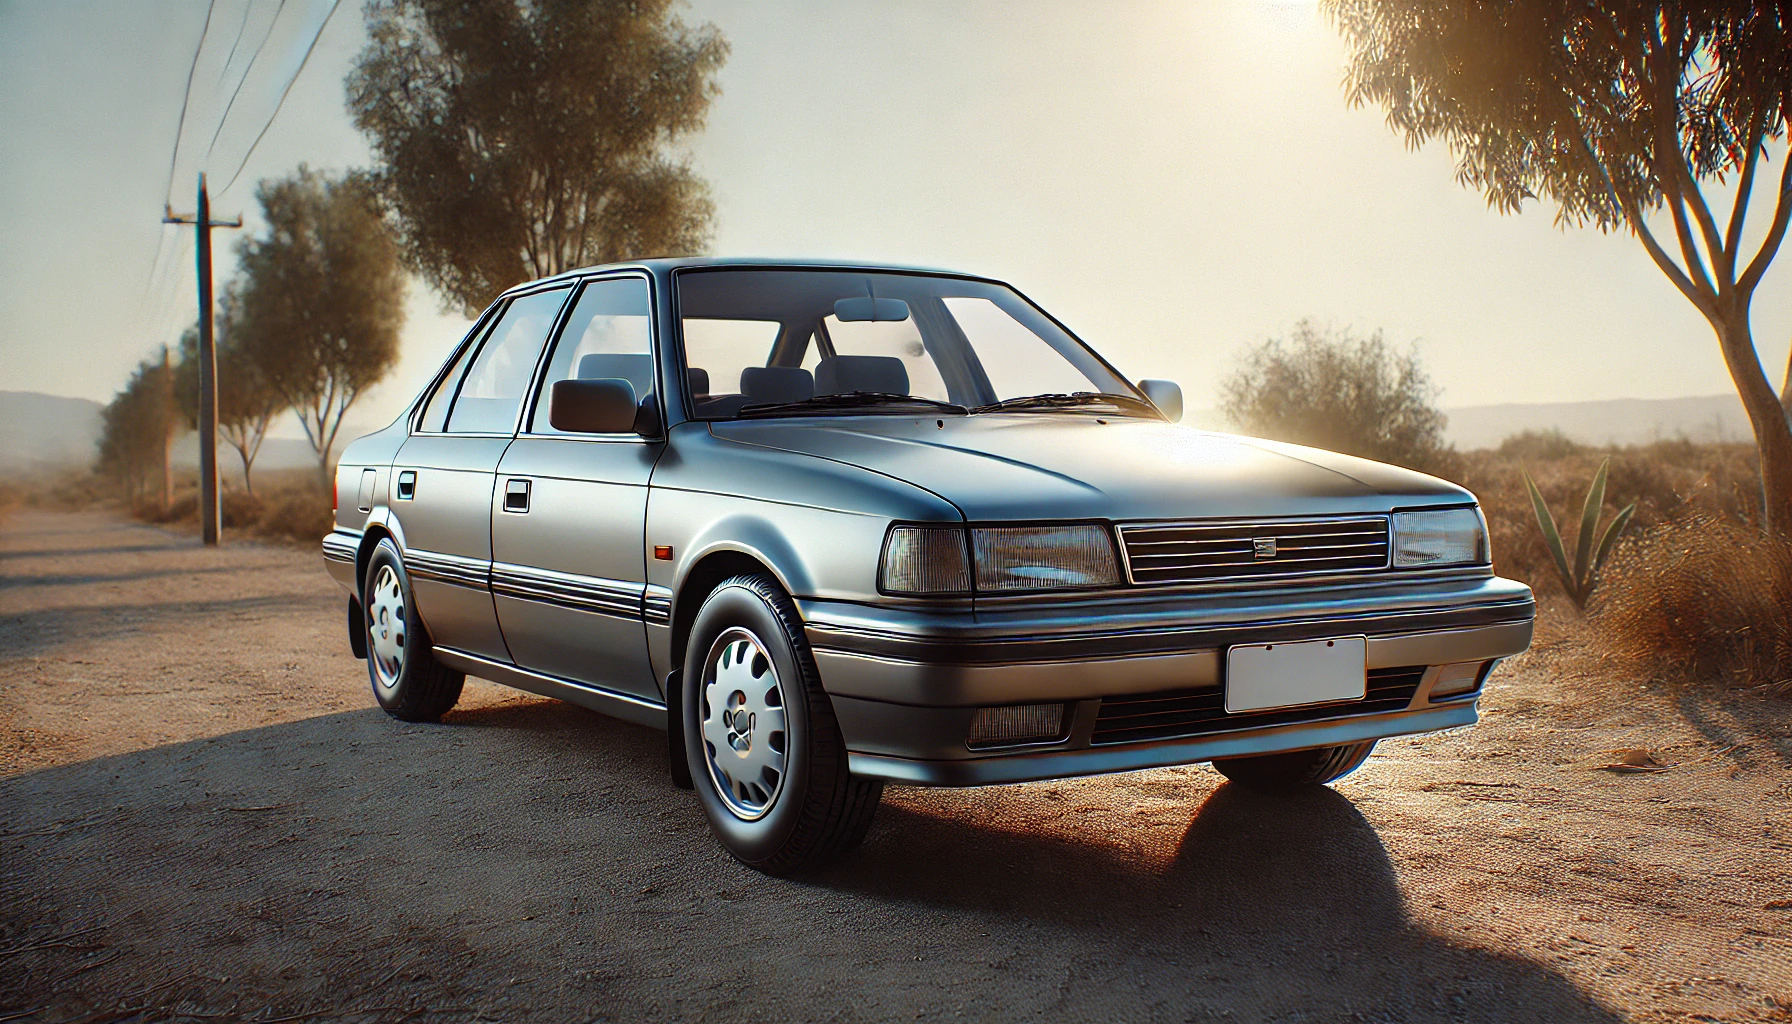

In [ ]:
novo_automovel_1 <- data.frame(
  Estilo = 'seda',
  Ano = 1996,
  Potencia_motor = 120
)

In [ ]:
predicao <- predict(modelo_boosting, new_data = novo_automovel_1)
predicao

.pred
<dbl>
2002.039


###**Automóvel 2**
> estilo minivan, ano 2003, potência do motor de 170

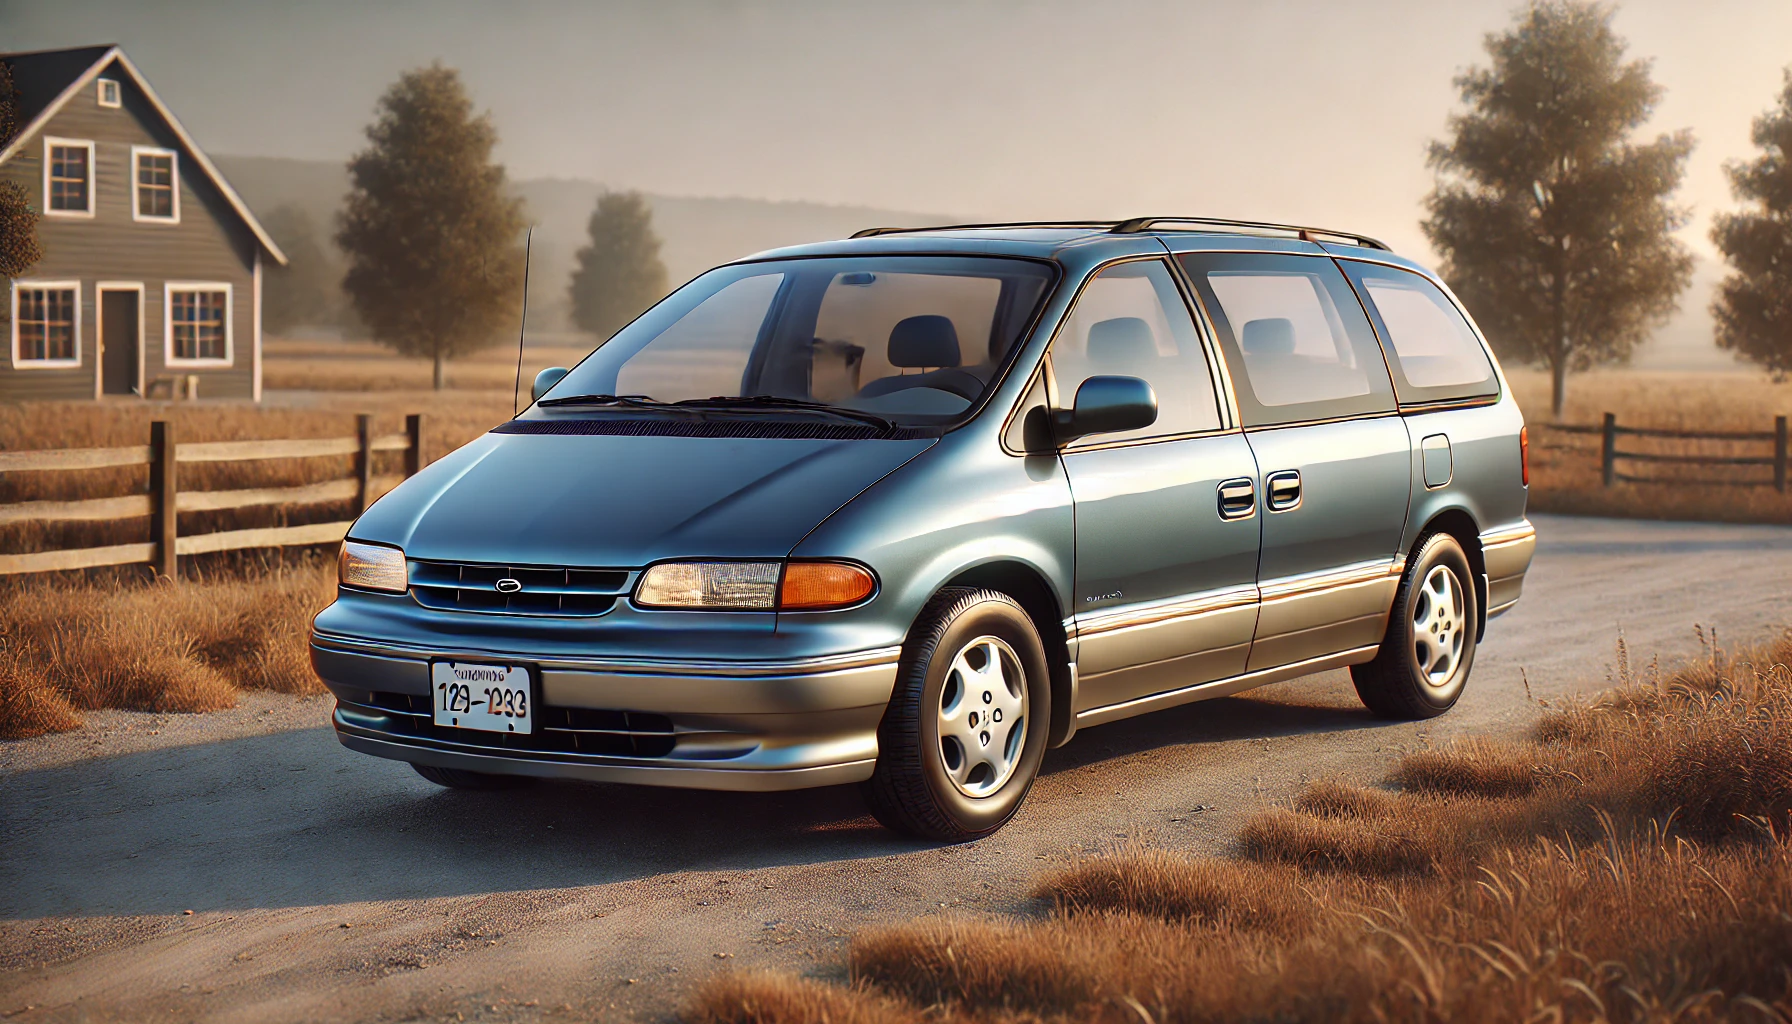

In [ ]:
novo_automovel_2 <- data.frame(
  Estilo = 'minivan de passageiros',
  Ano = 2003,
  Potencia_motor = 170
)

In [ ]:
predicao <- predict(modelo_boosting, new_data = novo_automovel_2)
predicao

.pred
<dbl>
23631.82


###**Automóvel 3**
> estilo SUV 4 portas, ano 2016, potência do motor de 220

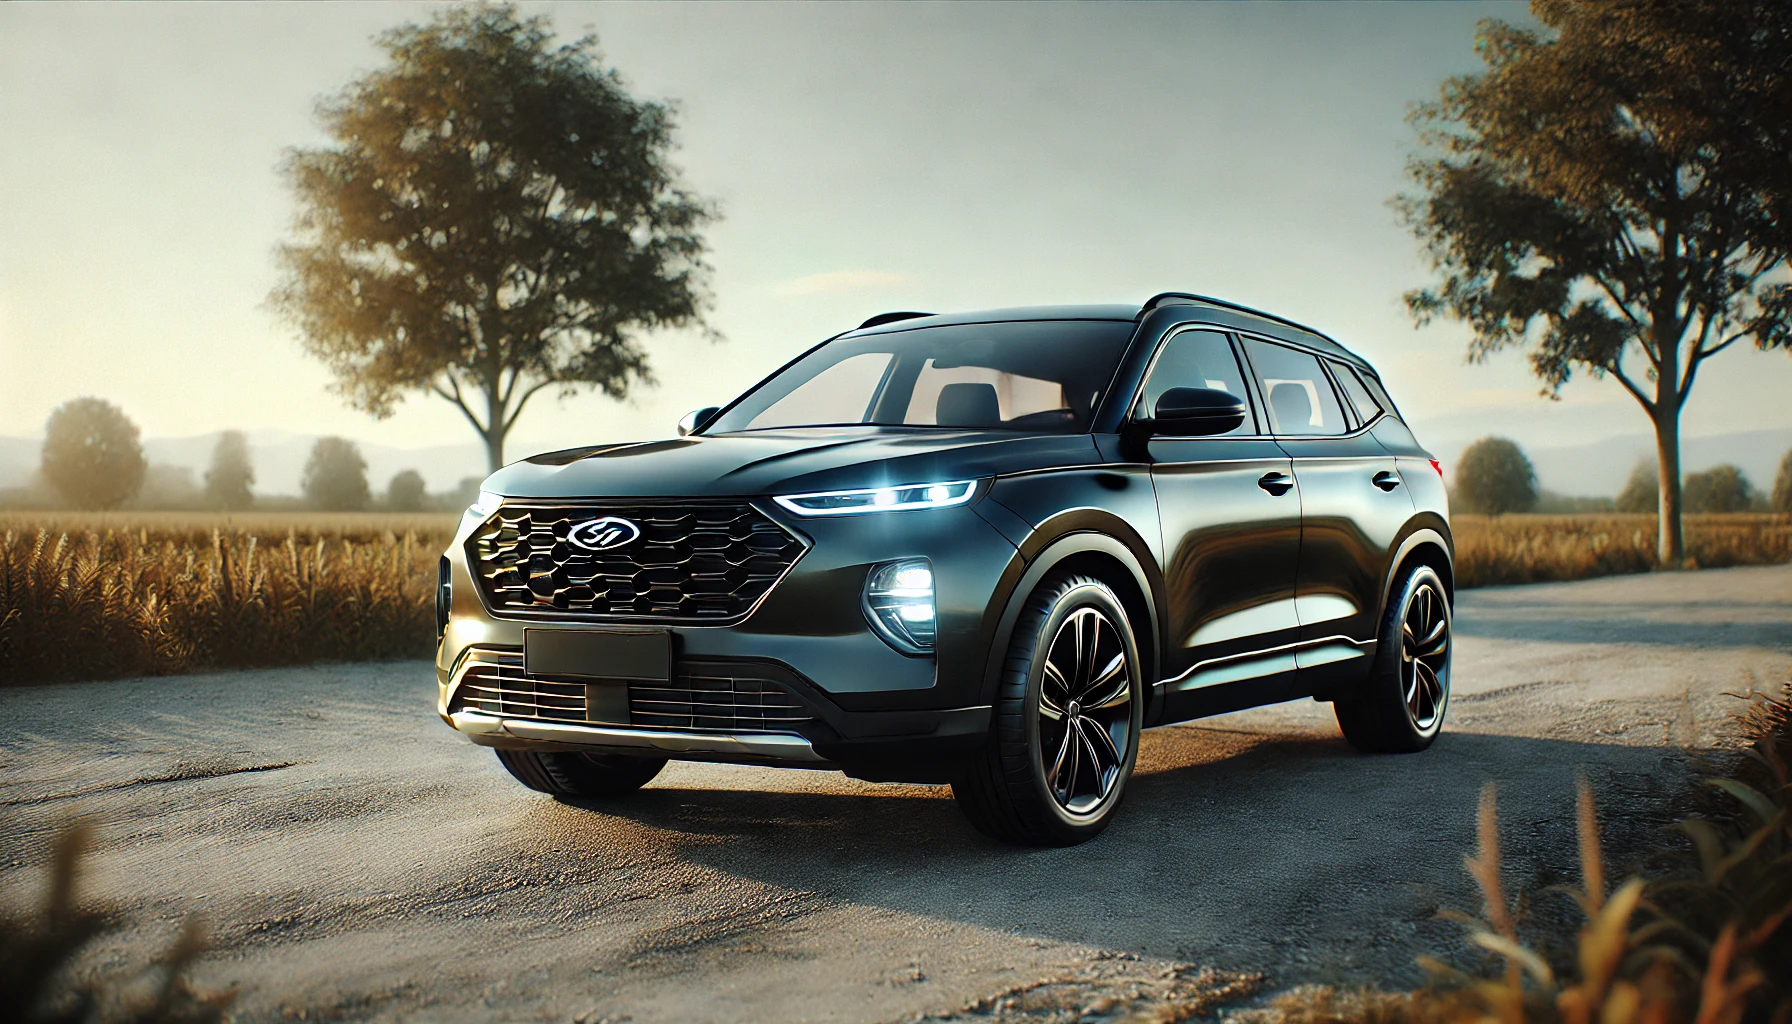

In [ ]:
novo_automovel_3 <- data.frame(
  Estilo = 'SUV 4 portas',
  Ano = 2016,
  Potencia_motor = 220
)

In [ ]:
predicao <- predict(modelo_boosting, new_data = novo_automovel_3)
predicao

.pred
<dbl>
41335.67
